# Lead Scoring Case Study

## Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.

There are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, we need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

X Education has appointed me to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires me to build a model wherein I'll need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

In [823]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler

## Reading the DataSet

In [824]:
leads = pd.read_csv('Leads.csv')

leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [825]:
#checking total rows and cols 

leads.shape

(9240, 37)

In [826]:
#basic data check
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [827]:
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## Data Cleaning 

In [828]:
leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [829]:
#check for duplicates
sum(leads.duplicated(subset = 'Prospect ID')) == 0

True

- No duplicate values

In [830]:
#check for duplicates
sum(leads.duplicated(subset = 'Lead Number')) == 0

True

- No Duplicate value in Lead Number too

In [831]:
#dropping Lead Number and Prospect ID since they have all unique values

leads.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

In [832]:
leads = leads.replace('Select', np.nan)

In [833]:
#checking null values in each rows

leads.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [834]:
#checking percentage of null values

round(100*(leads.isnull().sum()/len(leads.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [835]:
#dropping cols with more than 45% missing values

cols=leads.columns

for i in cols:
    if((100*(leads[i].isnull().sum()/len(leads.index))) >= 45):
        leads.drop(i, 1, inplace = True)

In [836]:
#checking null values percentage

round(100*(leads.isnull().sum()/len(leads.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

In [837]:
leads.shape

(9240, 28)

## Analysis for Categorical Attributes

In [838]:
#checking value counts of Country
leads['Country'].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

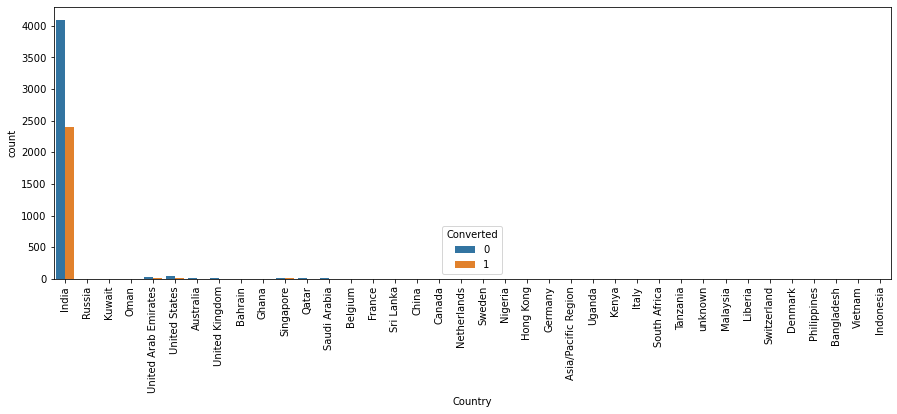

In [839]:
#plotting graphical analysis for Country columnn 

plt.figure(figsize=(15,5))
s1=sns.countplot(leads.Country, hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

- India is occurs to be the most common among the non-missing values 

In [840]:
leads['Country'] = leads['Country'].replace(np.nan,'India')

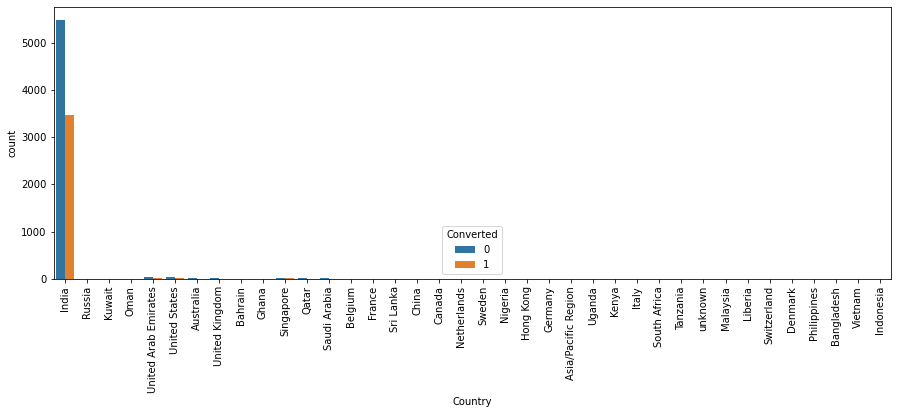

In [841]:
#plotting Country columnn again after replacing NaN values

plt.figure(figsize=(15,5))
s1=sns.countplot(leads.Country, hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

- the Number of Values for India are quite high 

In [842]:
#creating a list of columns to be droppped

cols_drop=['Country']

In [843]:
leads['City'].value_counts(dropna=False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [844]:
leads['City'] = leads['City'].replace(np.nan,'Mumbai')

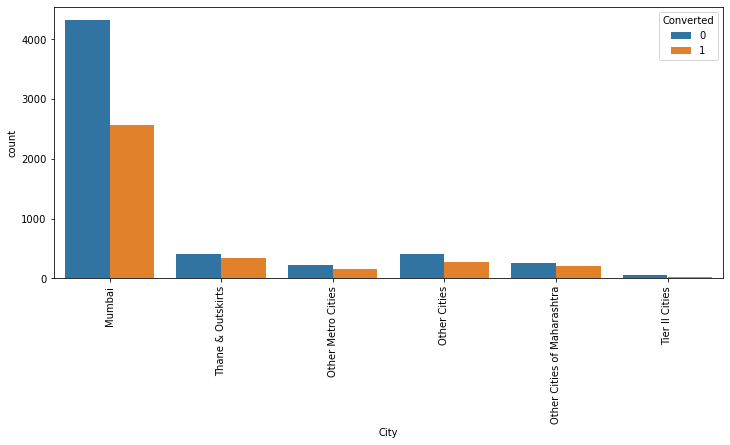

In [845]:
#plotting City columnn after replacing NaN values

plt.figure(figsize=(12,5))
s1=sns.countplot(leads.City, hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [846]:
#checking value counts of Specialization 

leads.Specialization.value_counts(dropna=False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [847]:
# replace NaN values here with 'Not Specified' in 'Specialization'

leads['Specialization'] = leads['Specialization'].replace(np.nan, 'Not Specified')

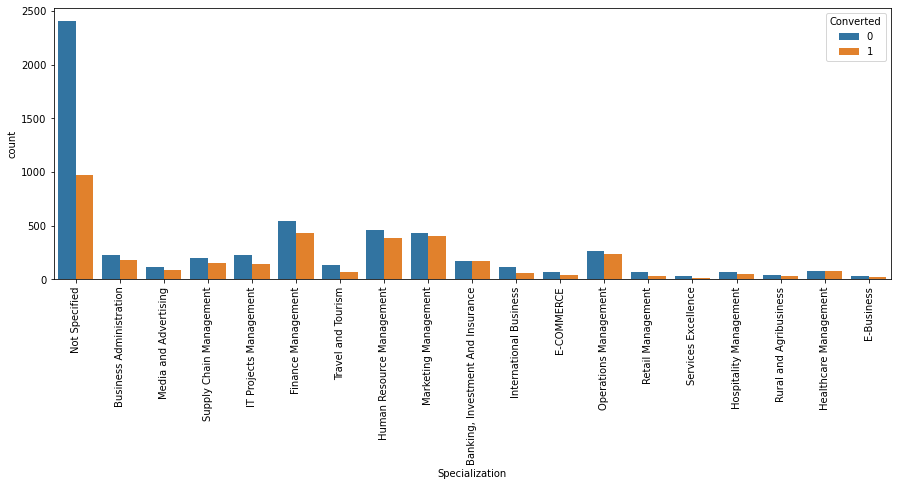

In [848]:
#plotting Specialization columnn 

plt.figure(figsize=(15,5))
s1=sns.countplot(leads.Specialization, hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

- As per observation  specialization with Management have higher number of leads as well as leads converted. So,It is definitely a significant variable and should not be dropped.

In [849]:
leads['Specialization'] = leads['Specialization'].replace(['Finance Management','Human Resource Management',
                                                           'Marketing Management','Operations Management',
                                                           'IT Projects Management','Supply Chain Management',
                                                    'Healthcare Management','Hospitality Management',
                                                           'Retail Management'] ,'Management_Specializations') 

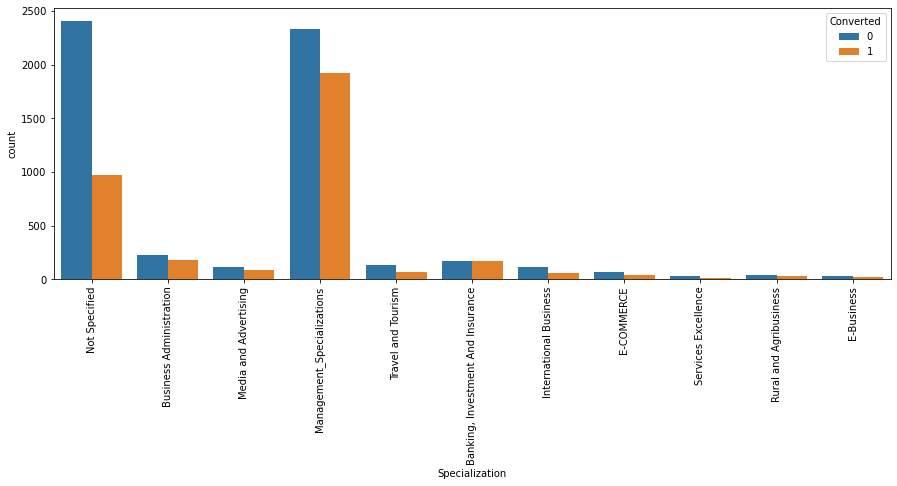

In [850]:
#visualizing count of Variable based on Converted value shown above


plt.figure(figsize=(15,5))
s1=sns.countplot(leads.Specialization, hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

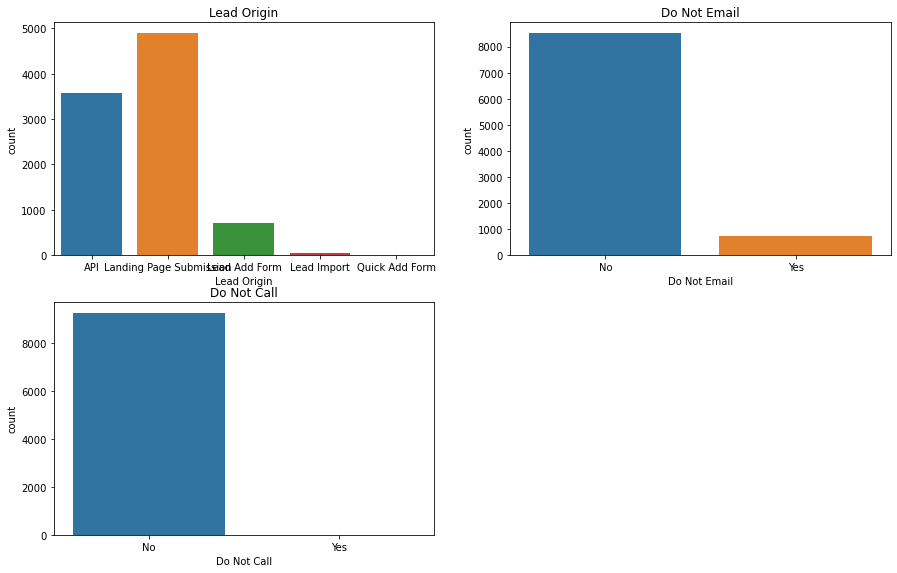

In [851]:
plt.figure(figsize = (15,30))

plt.subplot(6,2,1)
sns.countplot(leads['Lead Origin'])
plt.title('Lead Origin')

plt.subplot(6,2,2)
sns.countplot(leads['Do Not Email'])
plt.title('Do Not Email')

plt.subplot(6,2,3)
sns.countplot(leads['Do Not Call'])
plt.title('Do Not Call')

plt.show()

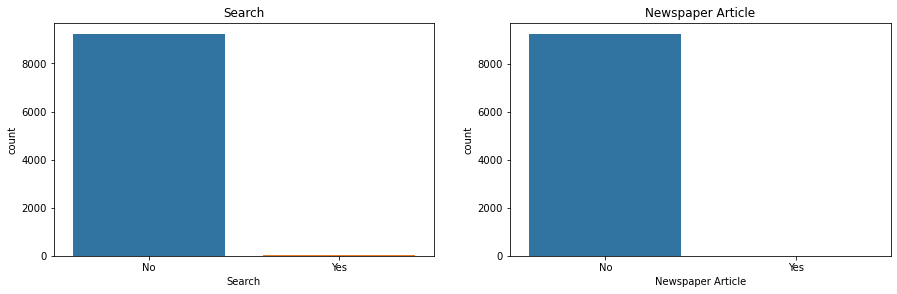

In [852]:
plt.figure(figsize = (15,30))

plt.subplot(6,2,5)
sns.countplot(leads['Search'])
plt.title('Search')

plt.subplot(6,2,6)
sns.countplot(leads['Newspaper Article'])
plt.title('Newspaper Article')

plt.show()

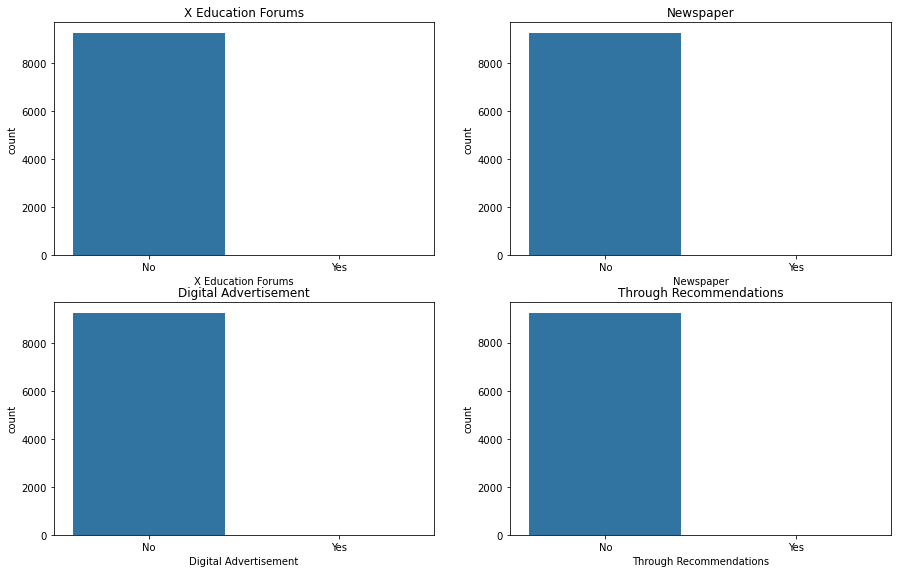

In [853]:
plt.figure(figsize = (15,30))
plt.subplot(6,2,7)
sns.countplot(leads['X Education Forums'])
plt.title('X Education Forums')

plt.subplot(6,2,8)
sns.countplot(leads['Newspaper'])
plt.title('Newspaper')

plt.subplot(6,2,9)
sns.countplot(leads['Digital Advertisement'])
plt.title('Digital Advertisement')

plt.subplot(6,2,10)
sns.countplot(leads['Through Recommendations'])
plt.title('Through Recommendations')
plt.show()

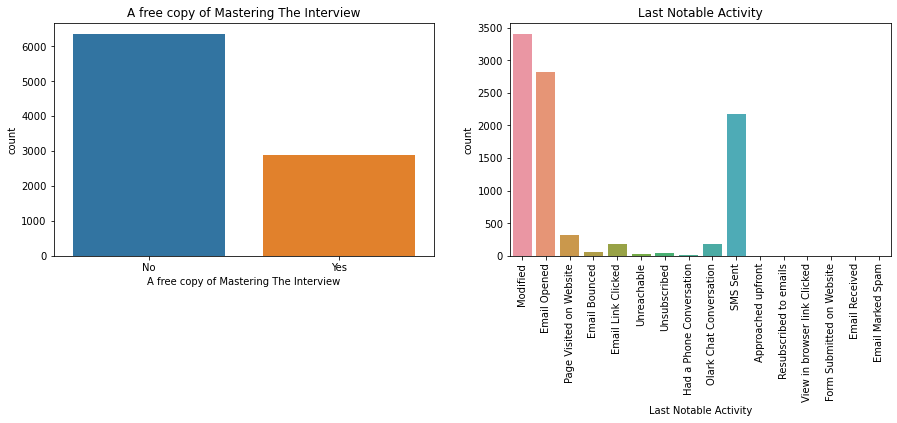

In [854]:
plt.figure(figsize = (15,30))
plt.subplot(6,2,11)
sns.countplot(leads['A free copy of Mastering The Interview'])
plt.title('A free copy of Mastering The Interview')

plt.subplot(6,2,12)
sns.countplot(leads['Last Notable Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')
plt.show()

In [855]:
#What is your current occupation

leads['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [856]:
leads['What is your current occupation'] = leads['What is your current occupation'].replace(np.nan, 'Unemployed')

In [857]:
#checking count of values
leads['What is your current occupation'].value_counts(dropna=False)

Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

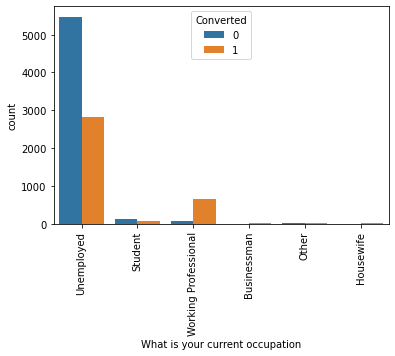

In [858]:
s1=sns.countplot(leads['What is your current occupation'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

- Working Professionals are going for the courses having high chances
- Unemployed leads are the mostly high in numbers

In [859]:
#checking value counts of variable
leads['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [860]:
cols_drop.append('What matters most to you in choosing a course')
cols_drop

['Country', 'What matters most to you in choosing a course']

In [861]:
leads.Tags.value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [862]:
#replacing Nan values for Tags with "Not Specified"

leads['Tags'] = leads['Tags'].replace(np.nan,'Not Specified')

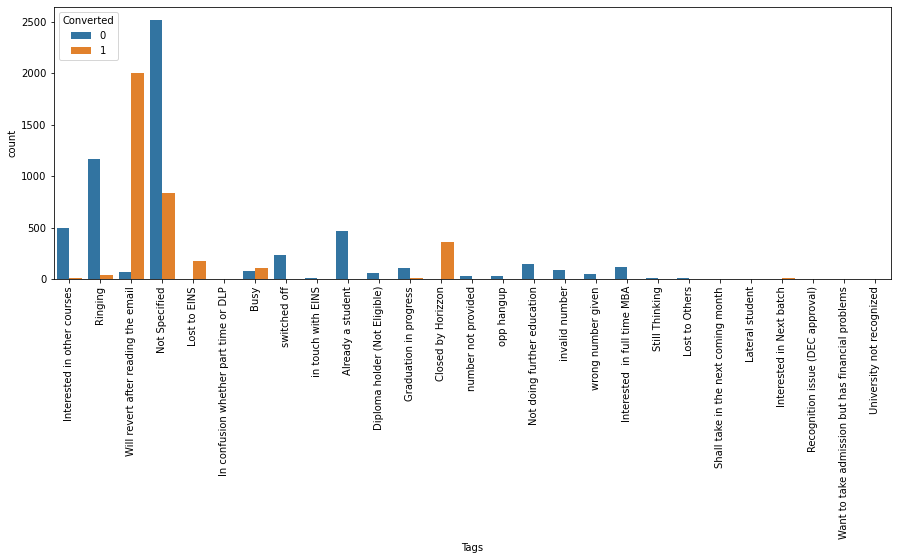

In [863]:
plt.figure(figsize=(15,5))
s1=sns.countplot(leads['Tags'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [864]:
#checking percentage of missing values
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                           0.00
Specialization                                    0.00
What is your current occupation                   0.00
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

In [865]:
leads['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [866]:
#replacing Nan Values and combining low frequency values
leads['Lead Source'] = leads['Lead Source'].replace(np.nan,'Others')
leads['Lead Source'] = leads['Lead Source'].replace('google','Google')
leads['Lead Source'] = leads['Lead Source'].replace('Facebook','Social Media')
leads['Lead Source'] = leads['Lead Source'].replace(['bing','Click2call','Press_Release','youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads',
                                                    'testone','NC_EDM'] ,'Others')    

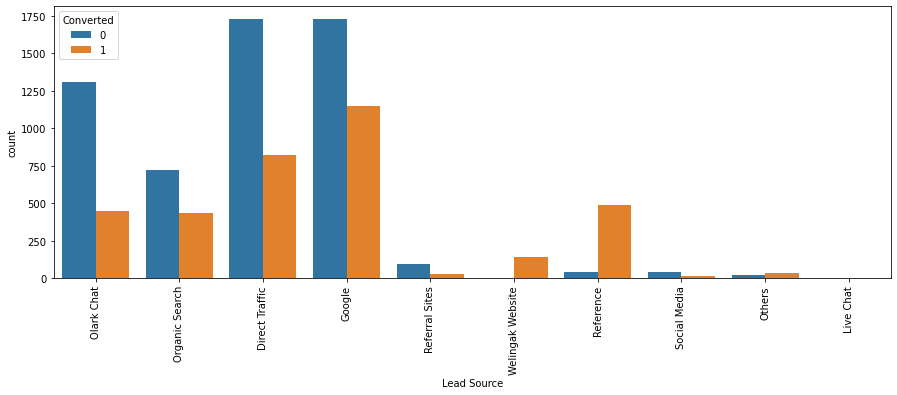

In [867]:
plt.figure(figsize=(15,5))
s1=sns.countplot(leads['Lead Source'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

- Maximum number of leads are generated by Google and Direct traffic.
- leads in welingak website is high
- To improve overall lead we should be on improving lead converion of olark chat, organic search, direct traffic, and google leads and generate more leads from reference and welingak website.

In [868]:
leads['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [869]:
leads['Last Activity'] = leads['Last Activity'].replace(np.nan,'Others')
leads['Last Activity'] = leads['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                        'Had a Phone Conversation', 
                                                        'Approached upfront',
                                                        'View in browser link Clicked',       
                                                        'Email Marked Spam',                  
                                                        'Email Received','Resubscribed to emails',
                                                         'Visited Booth in Tradeshow'],'Others')

In [870]:
leads['Last Activity'].value_counts(dropna=False)

Email Opened                 3437
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Others                        308
Email Link Clicked            267
Form Submitted on Website     116
Name: Last Activity, dtype: int64

In [871]:
#Check the Null Values in All Columns:
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.00
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     0.00
Country                                           0.00
Specialization                                    0.00
What is your current occupation                   0.00
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

In [872]:
leads = leads.dropna()

In [873]:
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

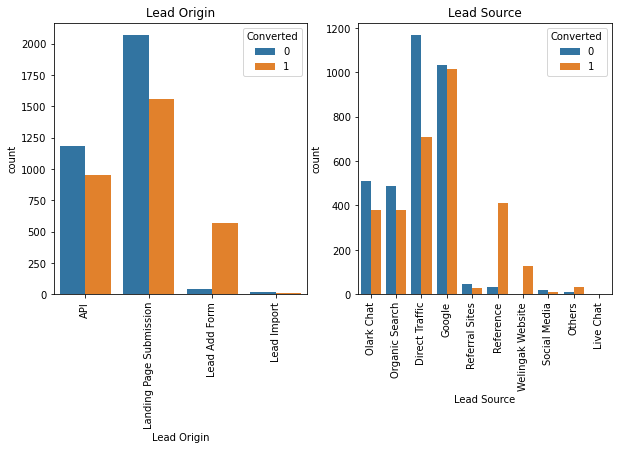

In [874]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Lead Origin', hue='Converted', data= leads).tick_params(axis='x', rotation = 90)
plt.title('Lead Origin')

plt.subplot(1,2,2)
sns.countplot(x='Lead Source', hue='Converted', data= leads).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()

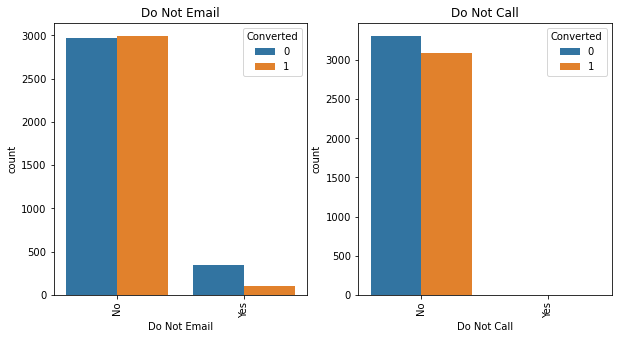

In [875]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Do Not Email', hue='Converted', data= leads).tick_params(axis='x', rotation = 90)
plt.title('Do Not Email')

plt.subplot(1,2,2)
sns.countplot(x='Do Not Call', hue='Converted', data= leads).tick_params(axis='x', rotation = 90)
plt.title('Do Not Call')
plt.show()

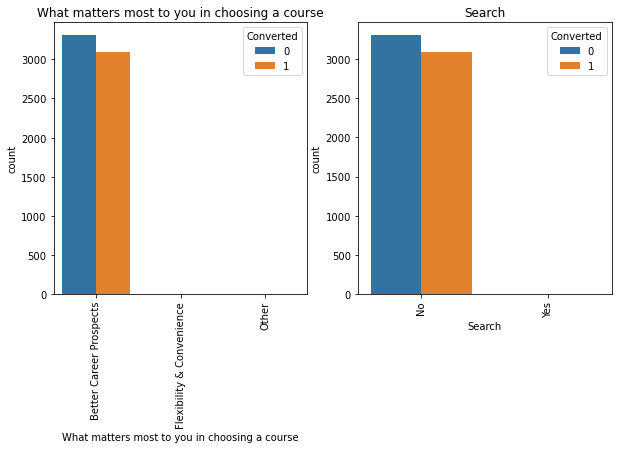

In [876]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='What matters most to you in choosing a course', hue='Converted', data= leads).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')

plt.subplot(1,2,2)
sns.countplot(x='Search', hue='Converted', data= leads).tick_params(axis='x', rotation = 90)
plt.title('Search')
plt.show()

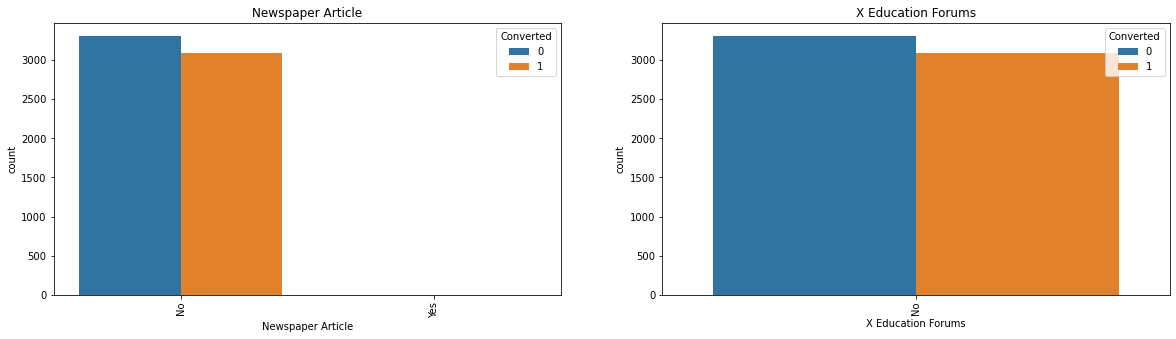

In [877]:
plt.figure(figsize = (20,5))

plt.subplot(1,2,1)
sns.countplot(x='Newspaper Article', hue='Converted', data= leads).tick_params(axis='x', rotation = 90)
plt.title('Newspaper Article')

plt.subplot(1,2,2)
sns.countplot(x='X Education Forums', hue='Converted', data= leads).tick_params(axis='x', rotation = 90)
plt.title('X Education Forums')
plt.show()

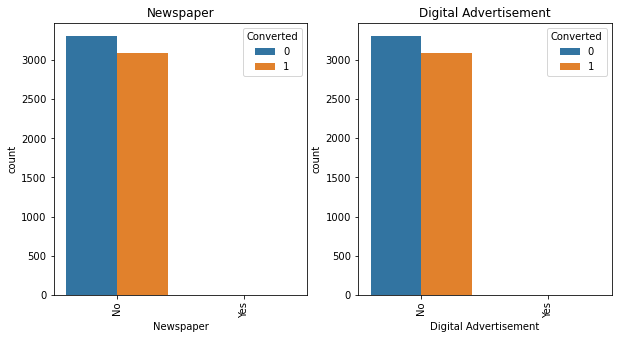

In [878]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Newspaper', hue='Converted', data= leads).tick_params(axis='x', rotation = 90)
plt.title('Newspaper')

plt.subplot(1,2,2)
sns.countplot(x='Digital Advertisement', hue='Converted', data= leads).tick_params(axis='x', rotation = 90)
plt.title('Digital Advertisement')
plt.show()

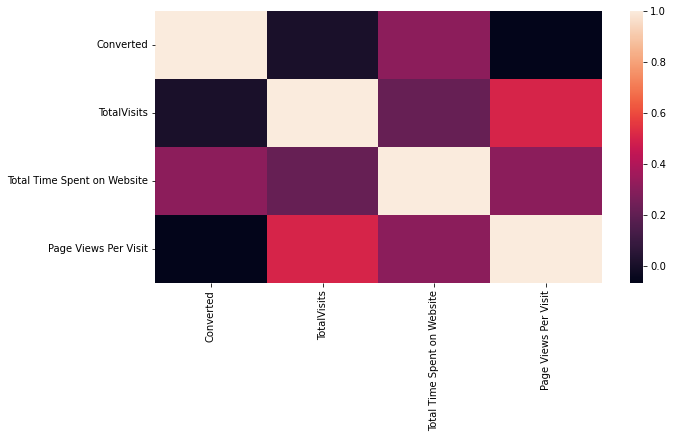

In [879]:
# To check the correlation among varibles
plt.figure(figsize=(10,5))
sns.heatmap(leads.corr())
plt.show()

In [880]:
num = leads[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
num.describe(percentiles=[0.25,0.5,0.75,0.9,0.99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,6401.000000,6401.000000,6401.000000
mean,3.590689,532.855491,2.468644
std,4.847158,565.262896,2.167626
min,0.000000,0.000000,0.000000
25%,1.000000,31.000000,1.000000
50%,3.000000,283.000000,2.000000
75%,5.000000,1020.000000,3.500000
90%,7.000000,1426.000000,5.000000
99%,17.000000,1849.000000,9.000000
max,251.000000,2272.000000,55.000000


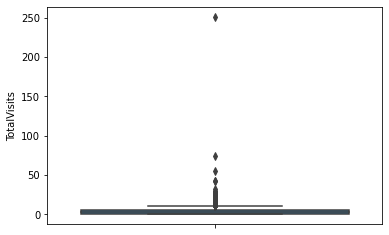

In [881]:
#Total Visits
plt.figure(figsize=(6,4))
sns.boxplot(y=leads['TotalVisits'])
plt.show()

- Outliers Present Here

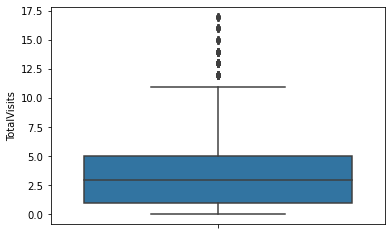

In [882]:
Q3 = leads.TotalVisits.quantile(0.99)
leads = leads[(leads.TotalVisits <= Q3)]
Q1 = leads.TotalVisits.quantile(0.01)
leads = leads[(leads.TotalVisits >= Q1)]
sns.boxplot(y=leads['TotalVisits'])
plt.show()

In [883]:
leads.shape

(6337, 28)

In [884]:
#checking percentiles for "Total Time Spent
leads['Total Time Spent on Website'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    6337.000000
mean      531.306770
std       564.904125
min         0.000000
5%          0.000000
25%        30.000000
50%       282.000000
75%      1019.000000
90%      1424.000000
95%      1591.000000
99%      1848.280000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

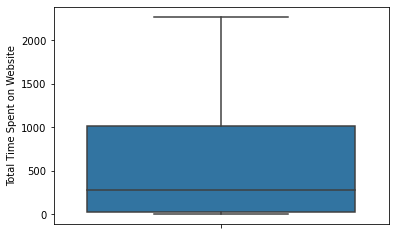

In [885]:
plt.figure(figsize=(6,4))
sns.boxplot(y=leads['Total Time Spent on Website'])
plt.show()

- there are no Outliers for the above variable 

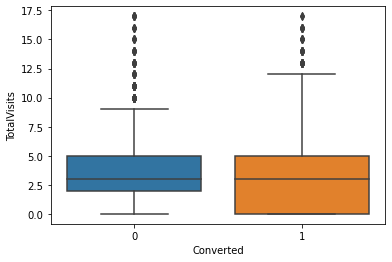

In [886]:
#checking Spread of "Total Visits" vs Converted variable
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = leads)
plt.show()

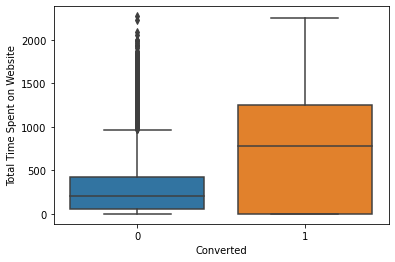

In [887]:
#checking Spread of "Total Time Spent on Website" vs Converted variable

sns.boxplot(x=leads.Converted, y=leads['Total Time Spent on Website'])
plt.show()

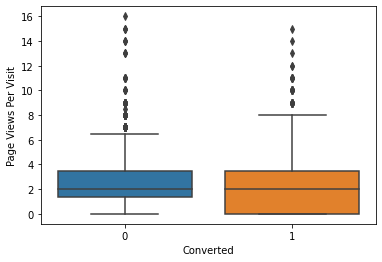

In [888]:
#checking Spread of "Page Views Per Visit" vs Converted variable

sns.boxplot(x=leads.Converted,y=leads['Page Views Per Visit'])
plt.show()

## Creating Dummy Variable

In [953]:
# Check the columns which are of type 'object'

temp = leads.loc[:, leads.dtypes == 'object']
temp.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Call', 'Last Activity', 'Country',
       'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'Last Notable Activity'],
      dtype='object')

In [957]:
# # Create dummy variables using the 'get_dummies' command
# dummy = pd.get_dummies(leads[['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
#                               'What is your current occupation','A free copy of Mastering The Interview', 
#                               'Last Notable Activity']], drop_first=True)

# # Add the results to the master dataframe
# xleads = pd.concat([leads, dummy], axis=1)

In [958]:
leads = leads.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                   'Specialization', 'What is your current occupation',
                   'A free copy of Mastering The Interview', 'Last Notable Activity'], 1)

In [960]:
leads.head()

,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,...,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given
0,No,0,0.0,0,0.0,India,Better Career Prospects,No,No,No,...,0,0,0,0,0,0,0,0,0,0
1,No,0,5.0,674,2.5,India,Better Career Prospects,No,No,No,...,0,0,0,0,0,0,0,0,0,0
2,No,1,2.0,1532,2.0,India,Better Career Prospects,No,No,No,...,0,0,0,1,0,0,0,0,0,0
3,No,0,1.0,305,1.0,India,Better Career Prospects,No,No,No,...,0,0,0,0,0,0,0,0,0,0
4,No,1,2.0,1428,1.0,India,Better Career Prospects,No,No,No,...,0,0,0,1,0,0,0,0,0,0


## Test-Train Split

In [961]:
from sklearn.model_selection import train_test_split

y=leads['Converted']
y.head()
x= leads.drop('Converted', axis=1)

In [962]:
# Splitting the data into train and test
x_train, x_test, y_train, y_test= train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=100)

In [963]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4435 entries, 4337 to 8267
Data columns (total 85 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Do Not Call                                             4435 non-null   object 
 1   TotalVisits                                             4435 non-null   float64
 2   Total Time Spent on Website                             4435 non-null   int64  
 3   Page Views Per Visit                                    4435 non-null   float64
 4   Country                                                 4435 non-null   object 
 5   What matters most to you in choosing a course           4435 non-null   object 
 6   Search                                                  4435 non-null   object 
 7   Magazine                                                4435 non-null   object 
 8   Newspaper Article                  

## Scaling

In [ ]:
# Import MinMax scaler

from sklearn.preprocessing import MinMaxScaler

In [902]:
scaler = MinMaxScaler()

x_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(x_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

x_train.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,...,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given
4337,Landing Page Submission,Direct Traffic,0,No,0.235294,0.586708,0.133333,SMS Sent,India,Media and Advertising,...,0,0,0,1,0,0,0,0,0,0
779,Landing Page Submission,Google,0,No,0.352941,0.006162,0.200000,Email Link Clicked,India,Management_Specializations,...,0,0,0,0,0,0,0,0,0,0
7435,API,Olark Chat,0,No,0.000000,0.000000,0.000000,SMS Sent,India,Not Specified,...,0,0,0,0,0,0,0,0,0,0
1948,Landing Page Submission,Organic Search,0,No,0.176471,0.184859,0.200000,Email Opened,India,Management_Specializations,...,0,0,0,0,0,0,0,0,0,0
5666,Landing Page Submission,Organic Search,1,No,0.470588,0.358715,0.533333,SMS Sent,India,"Banking, Investment And Insurance",...,0,0,0,1,0,0,0,0,0,0


In [903]:
conversion = (sum(leads['Converted'])/len(leads['Converted'].index))*100
conversion

48.240492346536215

- Coversion rate is 48.24%

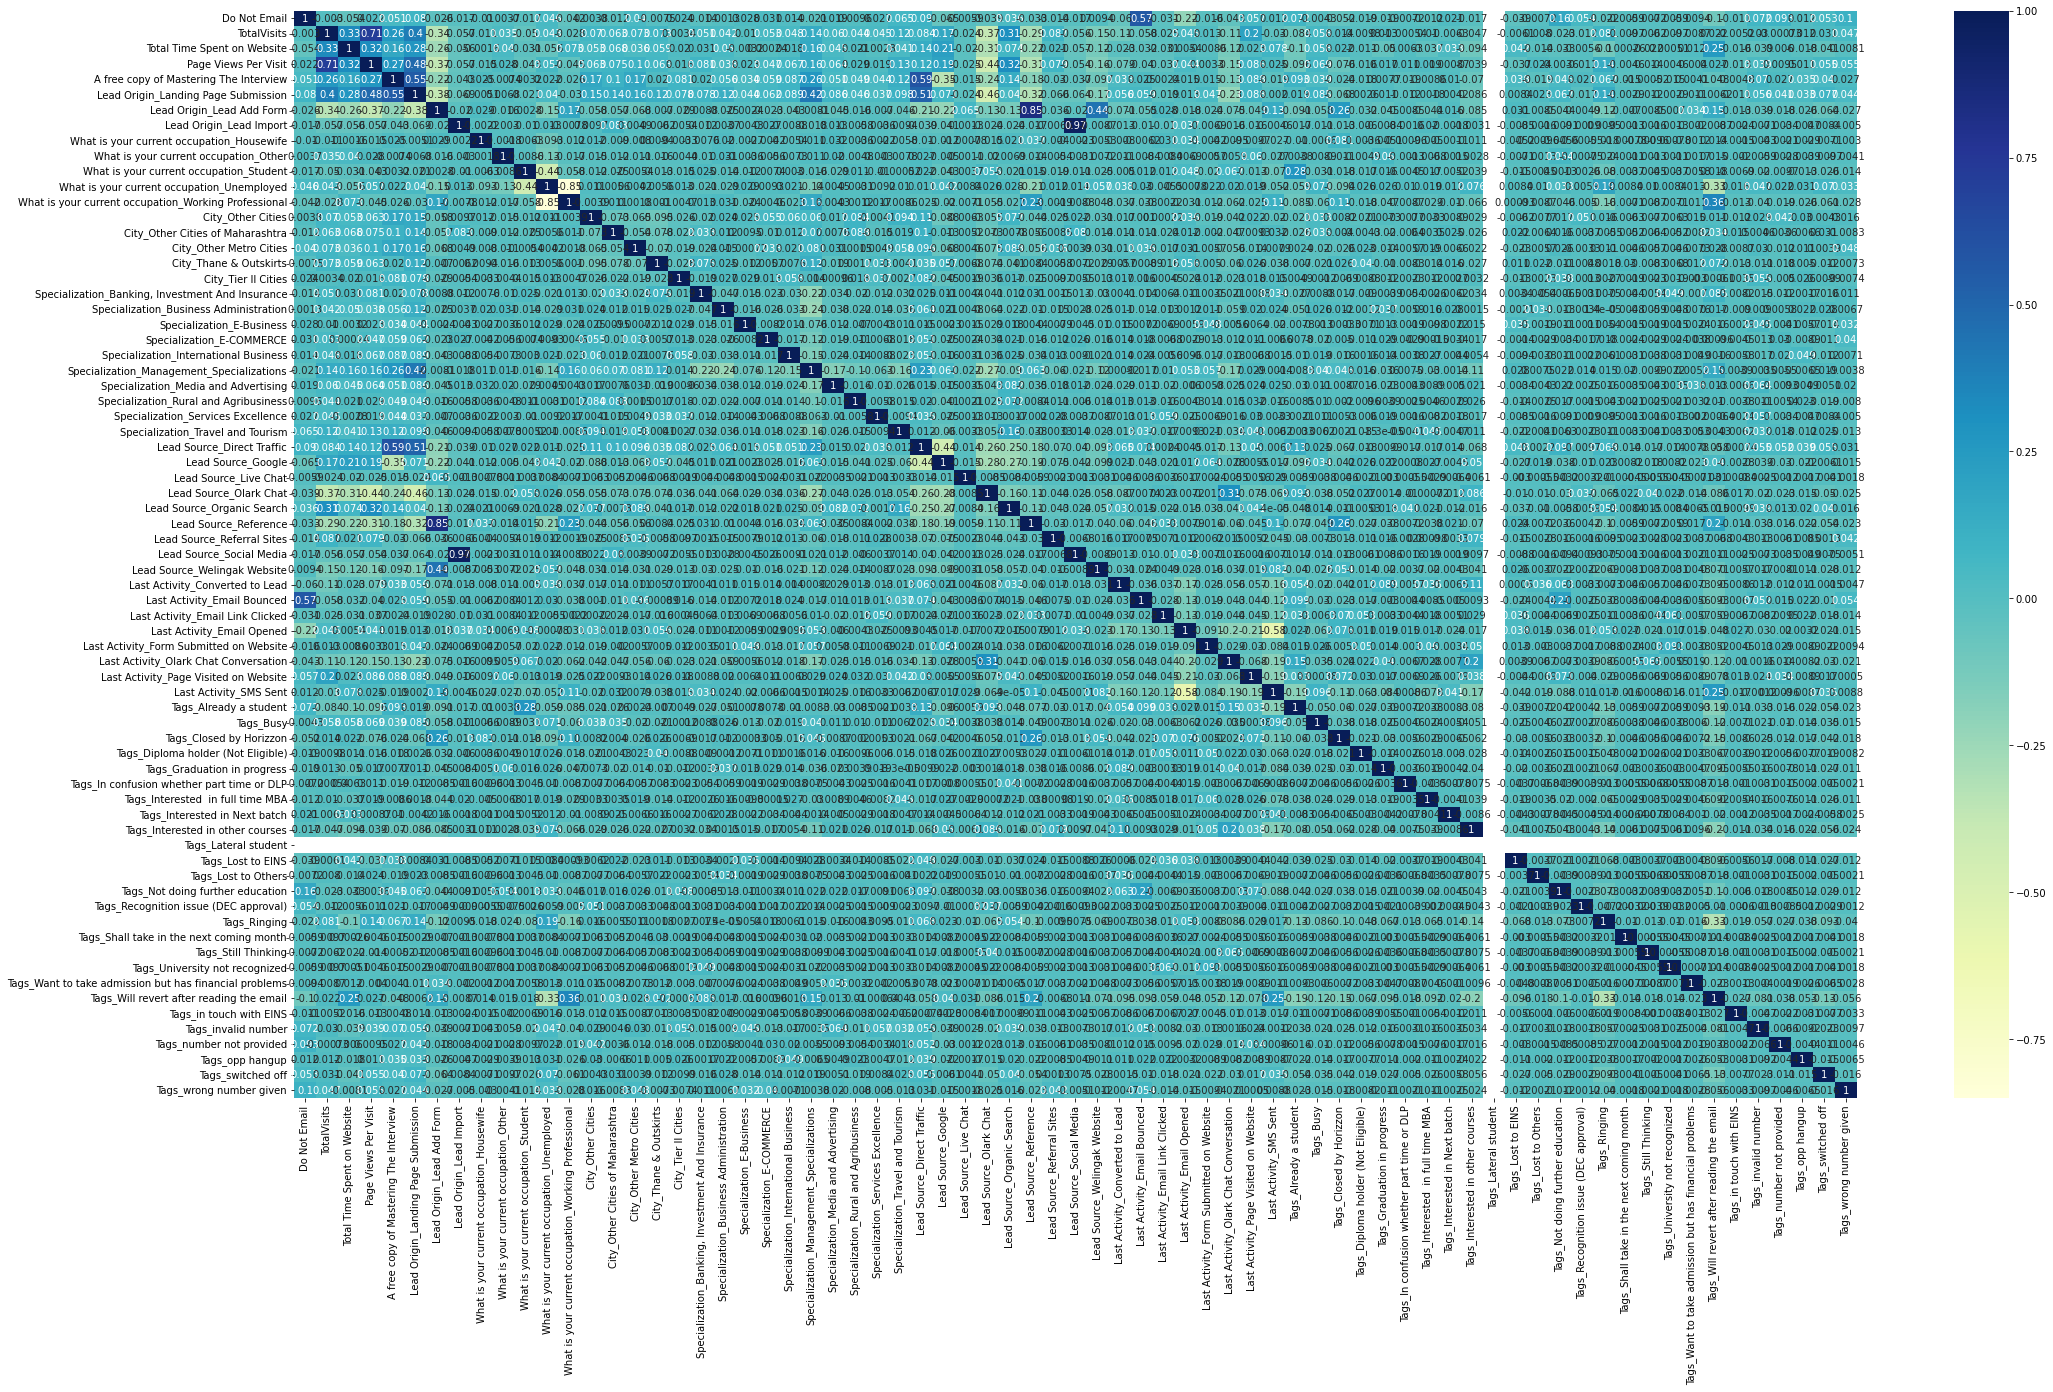

In [904]:
# Let observe the correlation matrix 
plt.figure(figsize = (35,20))       
sns.heatmap(x_train.corr(),annot = True, cmap="YlGnBu")
plt.show()

## Building Model

In [965]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [ ]:
# # Import RFE and select 15 variables

# from sklearn.feature_selection import RFE
# rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
# rfe = rfe.fit(x_train, y_train)

In [966]:
from sklearn.linear_model import LinearRegression

x = x.apply(pd.to_numeric, errors='coerce')
y = y.apply(pd.to_numeric, errors='coerce')

x.fillna(0, inplace=True)
y.fillna(0, inplace=True)

In [967]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)
clf = LinearRegression().fit(x_train, y_train)

In [968]:
 from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE variables(15) as output
rfe = rfe.fit(x_train, y_train)

In [969]:
rfe.support_

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False,  True, False,  True,  True,
        True, False,  True, False,  True, False,  True, False,  True,
       False,  True, False, False, False, False,  True, False,  True,
        True, False,  True,  True])

In [970]:
list(zip(x_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Call', False, 71),
 ('TotalVisits', False, 44),
 ('Total Time Spent on Website', False, 55),
 ('Page Views Per Visit', False, 46),
 ('Country', False, 66),
 ('What matters most to you in choosing a course', False, 65),
 ('Search', False, 61),
 ('Magazine', False, 59),
 ('Newspaper Article', False, 57),
 ('X Education Forums', False, 67),
 ('Newspaper', False, 56),
 ('Digital Advertisement', False, 58),
 ('Through Recommendations', False, 63),
 ('Receive More Updates About Our Courses', False, 68),
 ('Tags', False, 64),
 ('Update me on Supply Chain Content', False, 62),
 ('Get updates on DM Content', False, 60),
 ('City', False, 70),
 ('I agree to pay the amount through cheque', False, 69),
 ('Lead Origin_Landing Page Submission', False, 51),
 ('Lead Origin_Lead Add Form', False, 13),
 ('Lead Origin_Lead Import', False, 20),
 ('What is your current occupation_Housewife', False, 38),
 ('What is your current occupation_Other', False, 53),
 ('What is your current occupation_Stude

In [972]:
#list of RFE supported columns shown
col = x_train.columns[rfe.support_]

In [973]:
x_train.columns[~rfe.support_]

Index(['Do Not Call', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Country',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'City_Other Cities', 'City_Other Cities of Maharashtra',
       'City_Other Metro Cities', 'City_Thane & Outskirts',
       'C

### Building Model 1

In [975]:
# Import statsmodels
import statsmodels.api as sm

x_train_sm = sm.add_constant(x_train[col])
logm1 = sm.GLM(y_train,x_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4752
Model:                            GLM   Df Residuals:                     4736
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -888.31
Date:                Mon, 13 Jun 2022   Deviance:                       1776.6
Time:                        10:28:05   Pearson chi2:                 4.42e+03
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                        0.4346      0.080      5.449      0.000       0.278       0.591
Lead Source_Welingak Website                 3.8066      1.010      3.768      0.000       1.827       5.787
Tags_Already a student                      -5.5994      0.714     -7.847      0.000      -6.998      -4.201
Tags_Closed by Horizzon                     25.0282   1.43e+04      0.002      0.999    -2.8e+04    2.81e+04
Tags_Diploma holder (Not Eligible)         -26.0007   3.12e+04     -0.001      0.999   -6.11e+04    6.11e+04
Tags_Graduation in progress                 -3.4303      0.519     -6.616      0.000      -4.447      -2.414
Tags_Interested  in full time MBA           -4.1723      0.720     -5.796      0.000      -5.583      -2.761
Tags_Interested in other courses            -4.3088      0.390    -11.045      0.000      -5.073      -3.544
Tags_Lost to EINS                            2.9996      0.592      5.067      0.000       1.839       4.160
Tags_Not doing further education            -5.0596      1.008     -5.019      0.000      -7.035      -3.084
Tags_Ringing                                -3.8500      0.208    -18.513      0.000      -4.258      -3.442
Tags_Will revert after reading the email     3.0333      0.170     17.882      0.000       2.701       3.366
Tags_invalid number                         -4.4419      1.012     -4.388      0.000      -6.426      -2.458
Tags_number not provided                   -26.0007   4.71e+04     -0.001      1.000   -9.24e+04    9.24e+04
Tags_switched off                           -4.4480      0.588     -7.565      0.000      -5.600      -3.296
Tags_wrong number given                    -26.0007    3.7e+04     -0.001      0.999   -7.26e+04    7.26e+04
============================================================================================================
"""

- There are quite a few variable which have a p-value greater than 0.05

### VIF Value

In [976]:
# Check for the VIF values
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [977]:
# Create a dataframe contain the names of all the variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = x_train[col].columns
vif['VIF'] = [variance_inflation_factor(x_train[col].values, i) for i in range(x_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Lead Source_Welingak Website,1.01
2,Tags_Closed by Horizzon,1.01
3,Tags_Diploma holder (Not Eligible),1.00
4,Tags_Graduation in progress,1.00
5,Tags_Interested in full time MBA,1.00
7,Tags_Lost to EINS,1.00
8,Tags_Not doing further education,1.00
11,Tags_invalid number,1.00
12,Tags_number not provided,1.00
13,Tags_switched off,1.00


In [978]:
#dropping column with high p-value

col = col.drop('Tags_Closed by Horizzon',1)

### BUILDING MODEL2 

In [979]:
x_train_sm = sm.add_constant(x_train[col])
logm2 = sm.GLM(y_train,x_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4752
Model:                            GLM   Df Residuals:                     4737
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -974.53
Date:                Mon, 13 Jun 2022   Deviance:                       1949.1
Time:                        10:28:05   Pearson chi2:                 4.64e+03
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                        0.8484      0.074     11.425      0.000       0.703       0.994
Lead Source_Welingak Website                 3.5794      1.009      3.549      0.000       1.603       5.556
Tags_Already a student                      -6.0131      0.713     -8.434      0.000      -7.411      -4.616
Tags_Diploma holder (Not Eligible)         -25.4144   1.89e+04     -0.001      0.999   -3.71e+04     3.7e+04
Tags_Graduation in progress                 -3.8441      0.518     -7.425      0.000      -4.859      -2.829
Tags_Interested  in full time MBA           -4.5860      0.719     -6.376      0.000      -5.996      -3.176
Tags_Interested in other courses            -4.7225      0.389    -12.139      0.000      -5.485      -3.960
Tags_Lost to EINS                            2.5859      0.591      4.374      0.000       1.427       3.745
Tags_Not doing further education            -5.4733      1.008     -5.432      0.000      -7.448      -3.498
Tags_Ringing                                -4.2637      0.206    -20.706      0.000      -4.667      -3.860
Tags_Will revert after reading the email     2.6196      0.167     15.675      0.000       2.292       2.947
Tags_invalid number                         -4.8557      1.012     -4.799      0.000      -6.839      -2.873
Tags_number not provided                   -25.4144   2.86e+04     -0.001      0.999   -5.61e+04     5.6e+04
Tags_switched off                           -4.8617      0.587     -8.279      0.000      -6.013      -3.711
Tags_wrong number given                    -25.4144   2.25e+04     -0.001      0.999   -4.41e+04     4.4e+04
============================================================================================================
"""

In [980]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [981]:
# Create a dataframe contain the names of all the variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = x_train[col].columns
vif['VIF'] = [variance_inflation_factor(x_train[col].values, i) for i in range(x_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Lead Source_Welingak Website,1.00
2,Tags_Diploma holder (Not Eligible),1.00
3,Tags_Graduation in progress,1.00
4,Tags_Interested in full time MBA,1.00
6,Tags_Lost to EINS,1.00
7,Tags_Not doing further education,1.00
10,Tags_invalid number,1.00
11,Tags_number not provided,1.00
12,Tags_switched off,1.00
13,Tags_wrong number given,1.00


In [982]:
#dropping variable with high p-value

col = col.drop('Tags_number not provided',1)

### Building Model3

In [983]:
x_train_sm = sm.add_constant(x_train[col])
logm3 = sm.GLM(y_train,x_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4752
Model:                            GLM   Df Residuals:                     4738
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -999.26
Date:                Mon, 13 Jun 2022   Deviance:                       1998.5
Time:                        10:28:06   Pearson chi2:                 4.66e+03
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                        0.7704      0.072     10.659      0.000       0.629       0.912
Lead Source_Welingak Website                 3.6566      1.008      3.626      0.000       1.680       5.633
Tags_Already a student                      -5.9352      0.713     -8.327      0.000      -7.332      -4.538
Tags_Diploma holder (Not Eligible)         -25.3365   1.89e+04     -0.001      0.999   -3.71e+04     3.7e+04
Tags_Graduation in progress                 -3.7661      0.517     -7.279      0.000      -4.780      -2.752
Tags_Interested  in full time MBA           -4.5081      0.719     -6.269      0.000      -5.918      -3.099
Tags_Interested in other courses            -4.6446      0.389    -11.951      0.000      -5.406      -3.883
Tags_Lost to EINS                            2.6639      0.591      4.507      0.000       1.506       3.822
Tags_Not doing further education            -5.3954      1.007     -5.355      0.000      -7.370      -3.421
Tags_Ringing                                -4.1858      0.205    -20.397      0.000      -4.588      -3.784
Tags_Will revert after reading the email     2.6975      0.166     16.226      0.000       2.372       3.023
Tags_invalid number                         -4.7777      1.012     -4.723      0.000      -6.760      -2.795
Tags_switched off                           -4.7838      0.587     -8.149      0.000      -5.934      -3.633
Tags_wrong number given                    -25.3365   2.25e+04     -0.001      0.999   -4.41e+04     4.4e+04
============================================================================================================
"""

In [984]:
# Create a dataframe contain the names of all the variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = x_train[col].columns
vif['VIF'] = [variance_inflation_factor(x_train[col].values, i) for i in range(x_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Lead Source_Welingak Website,1.00
2,Tags_Diploma holder (Not Eligible),1.00
3,Tags_Graduation in progress,1.00
4,Tags_Interested in full time MBA,1.00
6,Tags_Lost to EINS,1.00
7,Tags_Not doing further education,1.00
10,Tags_invalid number,1.00
11,Tags_switched off,1.00
12,Tags_wrong number given,1.00
1,Tags_Already a student,0.27


In [985]:
#dropping variable with high p-value

col = col.drop('Tags_wrong number given',1)

## Evaluating Model

In [986]:
# Getting the Predicted values on the train set
y_train_pred = res.predict(x_train_sm)
y_train_pred[:10]

7376    0.005682
8171    0.683607
1301    0.020349
5129    0.031818
1916    0.683607
2855    0.683607
4144    0.969761
5659    0.969761
3445    0.969761
3177    0.969761
dtype: float64

In [987]:
y_train_pred = y_train_pred.values.reshape(-1) # Reshaping it into an array
y_train_pred[:10]

array([0.00568182, 0.6836067 , 0.02034884, 0.03181818, 0.6836067 ,
       0.6836067 , 0.9697615 , 0.9697615 , 0.9697615 , 0.9697615 ])

In [988]:
# Create a new dataframe 

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.005682,7376
1,1,0.683607,8171
2,0,0.020349,1301
3,0,0.031818,5129
4,1,0.683607,1916


In [989]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's observe head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,0,0.005682,7376,0
1,1,0.683607,8171,1
2,0,0.020349,1301,0
3,0,0.031818,5129,0
4,1,0.683607,1916,1


In [990]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[2108  330]
 [  48 2266]]


In [991]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.9204545454545454


In [992]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [993]:
# Let's observe the sensitivity of logistic regression model
TP / float(TP+FN)

0.9792566983578219

In [994]:
# Let us calculate specificity
TN / float(TN+FP)

0.8646431501230517

In [995]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.13535684987694832


In [996]:
# positive predictive value 
print (TP / float(TP+FP))

0.8728813559322034


In [997]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9777365491651205


## Ploting ROC Curve

In [998]:

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [999]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

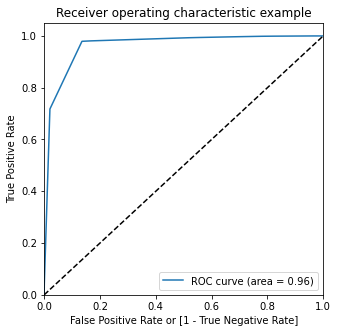

In [1000]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

- The ROC Curve should be a value close to 0.3, We obtain a good value of 0.96 indicating a good predictive model.

### Finding Optimal Cutoff Point

In [1001]:
# creating columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.005682,7376,0,1,0,0,0,0,0,0,0,0,0
1,1,0.683607,8171,1,1,1,1,1,1,1,1,0,0,0
2,0,0.020349,1301,0,1,0,0,0,0,0,0,0,0,0
3,0,0.031818,5129,0,1,0,0,0,0,0,0,0,0,0
4,1,0.683607,1916,1,1,1,1,1,1,1,1,0,0,0


In [1002]:
# Calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sens','spec'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    spec = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sens = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sens,spec]
print(cutoff_df)

     prob  accuracy      sens      spec
0.0   0.0  0.486953  1.000000  0.000000
0.1   0.1  0.920455  0.979257  0.864643
0.2   0.2  0.920455  0.979257  0.864643
0.3   0.3  0.920455  0.979257  0.864643
0.4   0.4  0.920455  0.979257  0.864643
0.5   0.5  0.920455  0.979257  0.864643
0.6   0.6  0.920455  0.979257  0.864643
0.7   0.7  0.852062  0.717805  0.979491
0.8   0.8  0.852062  0.717805  0.979491
0.9   0.9  0.852062  0.717805  0.979491


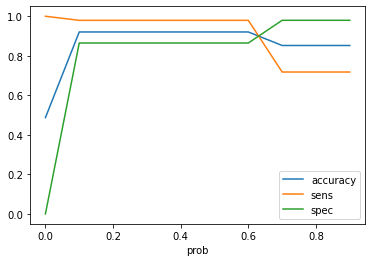

In [1003]:
# Let's plot accuracy sensitivity and specificity for different probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sens','spec'])
plt.show()

- you can see that around 0.42, you get the optimal values of the three metrics. So let's choose 0.42 as our cutoff now.

In [1004]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.42 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.005682,7376,0,1,0,0,0,0,0,0,0,0,0,0
1,1,0.683607,8171,1,1,1,1,1,1,1,1,0,0,0,1
2,0,0.020349,1301,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.031818,5129,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0.683607,1916,1,1,1,1,1,1,1,1,0,0,0,1


In [1007]:
# Let's check the accuracy now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9204545454545454

In [1008]:
# Let's create the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[2108,  330],
       [  48, 2266]], dtype=int64)

In [1009]:
# Calculate Sensitivity

TP/(TP+FN)

0.9792566983578219

In [1010]:
# Calculate Specificity

TN/(TN+FP)

0.8646431501230517

## Final Observation

- Accuracy - 92.04%
- Sensitivity - 97.92%
- Specificity - 86.46